In [1]:
from ase.visualize import view
import numpy as np
import matplotlib.pyplot as plt
from ase.spectrum.band_structure import BandStructure
from gpaw.new.ase_interface import GPAW
from ase.io import read, write
from tqdm import tqdm

files = !ls ../../../../dft/pts2/2x2supercellPtS2/strain/Aniso/magnetic/*.gpw
files = sorted(files)
files[0:11]= files[0:11][::-1]
lenfiles = len(files)
energies = []
magmoms = []
addatoms = []
for i in range(lenfiles):
    try:
        atoms = GPAW(files[i]).get_atoms()
        addatoms.append(atoms)
        energy = atoms.get_potential_energy()
        magmom = atoms.calc.calculation.magmoms()[0]
        energies.append(energy)
        magmoms.append(np.linalg.norm(magmom))
    except Exception as error:
        print('%s error in file:%s'%(error,files[i]))

        
        
        


No protocol specified


fermi_levels error in file:../../../../dft/pts2/2x2supercellPtS2/strain/Aniso/magnetic/PtS2_vacPt_magnetic_0.004.gpw
fermi_levels error in file:../../../../dft/pts2/2x2supercellPtS2/strain/Aniso/magnetic/PtS2_vacPt_magnetic_0.006.gpw
fermi_levels error in file:../../../../dft/pts2/2x2supercellPtS2/strain/Aniso/magnetic/PtS2_vacPt_magnetic_0.008.gpw


In [2]:
import py3Dmol

trajfiles = !ls ../../../../dft/pts2/2x2supercellPtS2/strain/Aniso/magnetic/*.traj
trajfiles = sorted(trajfiles)
trajfiles[0:11]= trajfiles[0:11][::-1]
lenfiles = len(trajfiles)


In [3]:
# for file in trajfiles:
#     write('xyz-files/%s.xyz'%(file.split('/')[-1].split('.traj')[0]),read(file))
xyz_files = !ls xyz-files/*.xyz
xyzview = py3Dmol.view(width=300,height=300)
xyzview.addModel(xyz_files[1],'xyz',)
xyzview.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

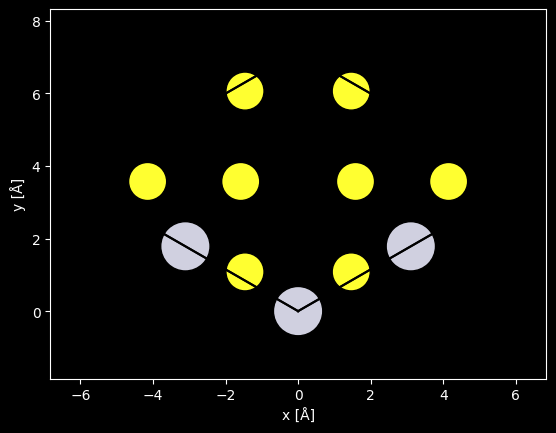

In [10]:
from abtem.visualize import show_atoms
show_atoms(read(xyz_files[0]));
